In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
%matplotlib inline

In [121]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

### Part A:

In [122]:
carlist = cars_od.index

In [123]:
from sklearn.manifold import MDS

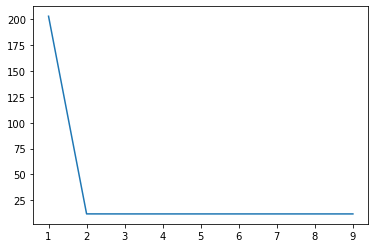

In [136]:
y = [0]
x = [0]
for i in range(1,10):
    mds = MDS(n_components=i, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    y.append(mds_fit_out.stress_)
    #print(f'For {i} components BOF = {y[i]}')
    x.append(i)
plt.plot(x[1:],y[1:])
#np.random.get_state()

Seems that for k = 2 we get the best fit. Afterwards, the BOF remains constant. Therefore, it is most reasonable to choose k = 2 as opposed to k = 9 because there is no improvement in BOF. 

In [137]:
### Storing Car Attributes 
car = []
attributes = []
for i in carlist: 
    car.append(i)
att = cars_ar.columns
for i in att:
    attributes.append(i)

In [138]:
### Sorting cars by each attribute to determine best axes for plot. 
order = []
for i in attributes:
    ordered = cars_ar.sort_values(by = [i], ascending= False).index
    for j in ordered: 
        order.append(j)

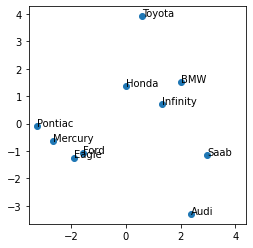

In [142]:
mds = MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9,random_state=11, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)
x = mds_fit_out.embedding_[:,0]
y = mds_fit_out.embedding_[:,1]
fig = plt.scatter(x,y)
plt.axis('square')
for i in range(10):
    plt.text(x[i],y[i],car[i])
#np.random.get_state()

In [12]:
### Printing different sort orders according to attribute. 
j = 0
for i in range(1,16):
    print(attributes[i-1],':',order[j:i*10])
    j = i*10 

Attractive : ['BMW', 'Infinity', 'Toyota', 'Saab', 'Honda', 'Audi', 'Ford', 'Eagle', 'Pontiac', 'Mercury']
Quiet : ['Infinity', 'Honda', 'Audi', 'BMW', 'Saab', 'Toyota', 'Ford', 'Eagle', 'Mercury', 'Pontiac']
Unreliable : ['Eagle', 'Ford', 'Mercury', 'Pontiac', 'Audi', 'Saab', 'Honda', 'Infinity', 'BMW', 'Toyota']
Poorly Built : ['Pontiac', 'Eagle', 'Mercury', 'Ford', 'Honda', 'Saab', 'Audi', 'Toyota', 'BMW', 'Infinity']
Interesting : ['Pontiac', 'Ford', 'Toyota', 'Audi', 'Eagle', 'Mercury', 'Infinity', 'Honda', 'Saab', 'BMW']
Sporty : ['Toyota', 'Pontiac', 'Mercury', 'Honda', 'Ford', 'Eagle', 'Saab', 'Infinity', 'BMW', 'Audi']
Uncomfortable : ['Mercury', 'Pontiac', 'Ford', 'Eagle', 'Toyota', 'BMW', 'Honda', 'Infinity', 'Saab', 'Audi']
Roomy : ['Saab', 'Audi', 'BMW', 'Infinity', 'Ford', 'Honda', 'Eagle', 'Mercury', 'Toyota', 'Pontiac']
Easy Service : ['Honda', 'Ford', 'Toyota', 'Pontiac', 'Infinity', 'Eagle', 'Mercury', 'BMW', 'Saab', 'Audi']
Prestige : ['Infinity', 'BMW', 'Audi', 'Saa

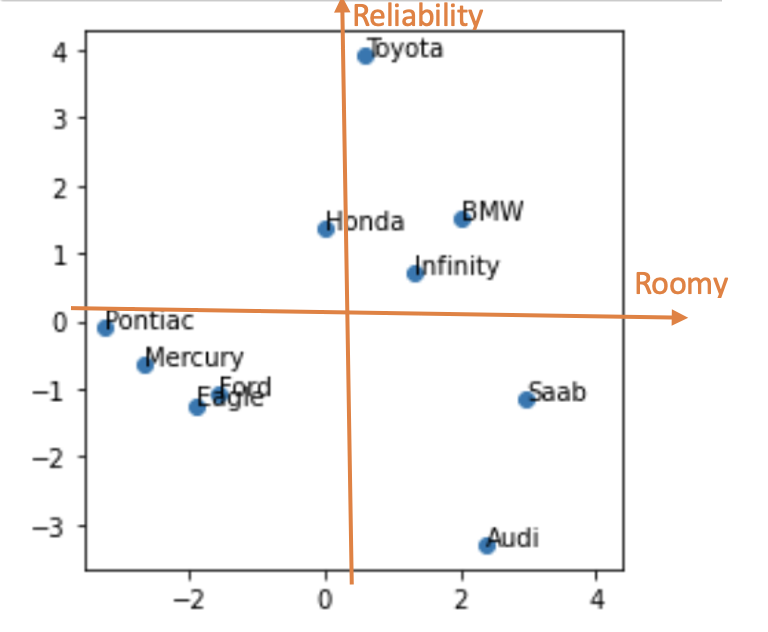

In [168]:
from IPython.display import Image
Image(filename='Graph.png', width= 400, height= 400)


In [14]:
print(attributes[3-1],':',order[20:30])
print(attributes[8-1],':',order[70:80])

Unreliable : ['Eagle', 'Ford', 'Mercury', 'Pontiac', 'Audi', 'Saab', 'Honda', 'Infinity', 'BMW', 'Toyota']
Roomy : ['Saab', 'Audi', 'BMW', 'Infinity', 'Ford', 'Honda', 'Eagle', 'Mercury', 'Toyota', 'Pontiac']


This ordering makes the most sense with the current plot. 

### Part B:

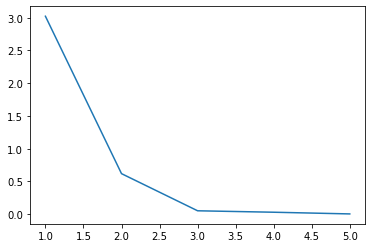

In [155]:
y = [0]
x = [0]
for i in range(1,6):
    mds = MDS(n_components=i, metric= False, max_iter=1000, eps=1e-9,random_state=10, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    y.append(mds_fit_out.stress_)
    #print(f'For {i} components BOF = {y[i]}')
    x.append(i)
plt.plot(x[1:],y[1:])

k = 3 

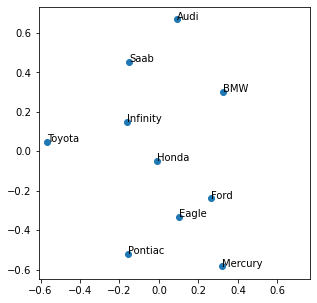

In [174]:
mds = MDS(n_components=2, metric=False, max_iter=1000, eps=1e-9,random_state=10, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)
x = mds_fit_out.embedding_[:,0]
y = mds_fit_out.embedding_[:,1]
fig = plt.scatter(x,y)
plt.axis('square')
for i in range(10):
    plt.text(x[i],y[i],car[i])
plt.rcParams["figure.figsize"] = (10,10)

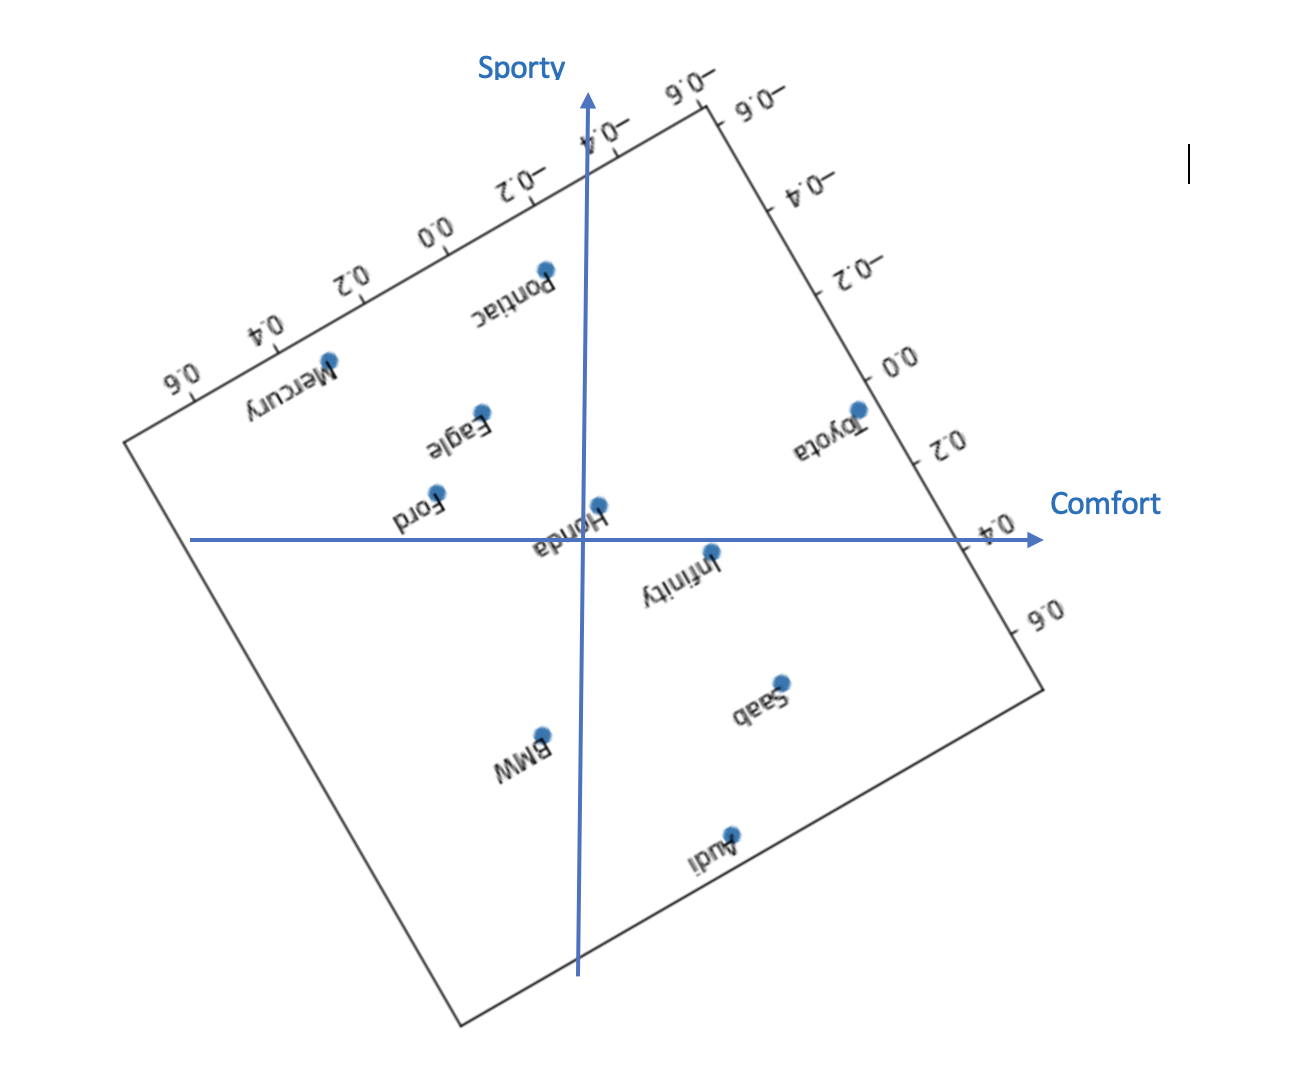

In [175]:
from IPython.display import Image
Image(filename='Graph2.png', width= 400, height= 400)

Rotate 150 degrees clockwise.

For 1 components GOF = 7.3946314580144366
For 2 components GOF = 10.113629586832742
For 3 components GOF = 12.186871387461581
For 4 components GOF = 13.362070826041917
For 5 components GOF = 13.785100065523473
For 6 components GOF = 14.472178192030809
For 7 components GOF = 14.779709804822357
For 8 components GOF = 14.934850050365352
For 9 components GOF = 14.955000000000004
For 10 components GOF = 14.955000000000004


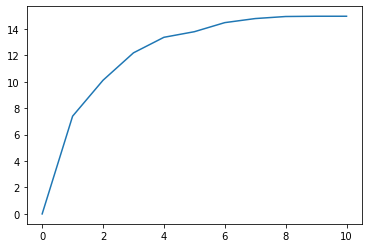

In [158]:
from factor_analyzer import FactorAnalyzer
y = [0]
x = [0]
for i in range(1,11):
    fa = FactorAnalyzer(n_factors=i, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    fa_gof = sum(fa_communalities)
    fa_scores = fa_fit_out.transform(cars_ar)
    fa_factor_loadings = fa_fit_out.loadings_
    y.append(fa_gof)
    print(f'For {i} components GOF = {fa_gof}')
    x.append(i)
plt.plot(x,y)

Seems that for k = 6 we get the best fit. Afterwards, the GOF almost remains constant. Therefore, it is most reasonable to choose k = 6.

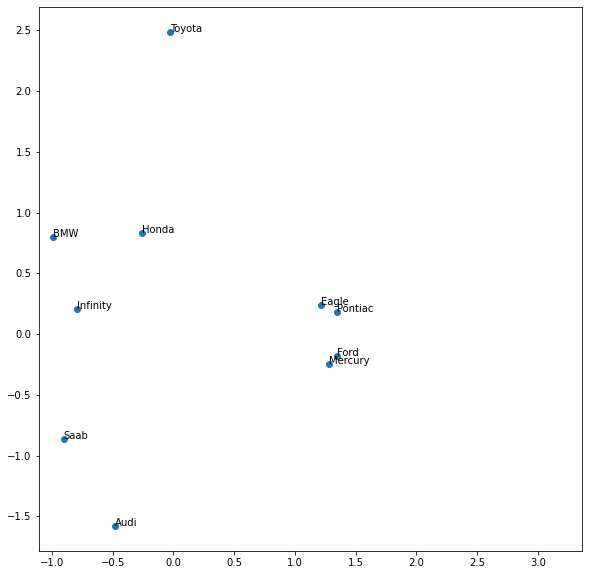

In [247]:
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_
x = fa_scores[:,0]
y = fa_scores[:,1]
fig = plt.scatter(x,y)
plt.axis('square')
for i in range(10):
    plt.text(x[i],y[i],car[i])

In [248]:
fa_scores[:,:]

array([[-0.79636428,  0.2088309 ],
       [ 1.34819661, -0.18191562],
       [-0.47992839, -1.58035312],
       [-0.03044225,  2.48660238],
       [ 1.21308606,  0.23580513],
       [-0.25549556,  0.82788359],
       [-0.90201609, -0.86281673],
       [ 1.34819661,  0.17745938],
       [-0.99276294,  0.79933661],
       [ 1.28318558, -0.24402388]])

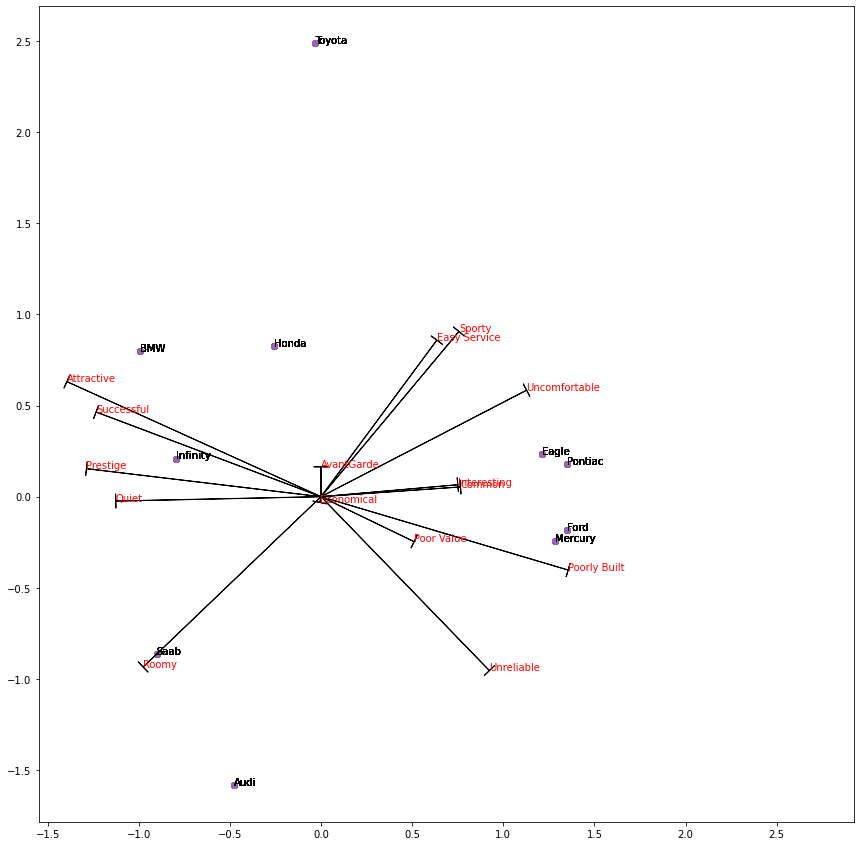

In [253]:
plt.rcParams["figure.figsize"] = (15,15)
for i in range(15):
    betax = fa_factor_loadings[i,0]
    betay = fa_factor_loadings[i,1]
    arrowlengthscaleup = 1.5
    R2value = fa_communalities[i]
    arrowlabel = attributes[i]
    arrow_origin_x = 0
    arrow_origin_y = 0
    arrow_end_x = arrowlengthscaleup*R2value*betax/math.sqrt(betax**2+betay**2)
    arrow_end_y = arrowlengthscaleup*R2value*betay/math.sqrt(betax**2+betay**2)
    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, length_includes_head=True, head_width=0.08, head_length=0.0002)
    plt.text(arrow_end_x, arrow_end_y, arrowlabel,c = 'r')
    fig = plt.scatter(x,y)
    plt.axis('square')
    for i in range(10):
        plt.text(x[i],y[i],car[i])

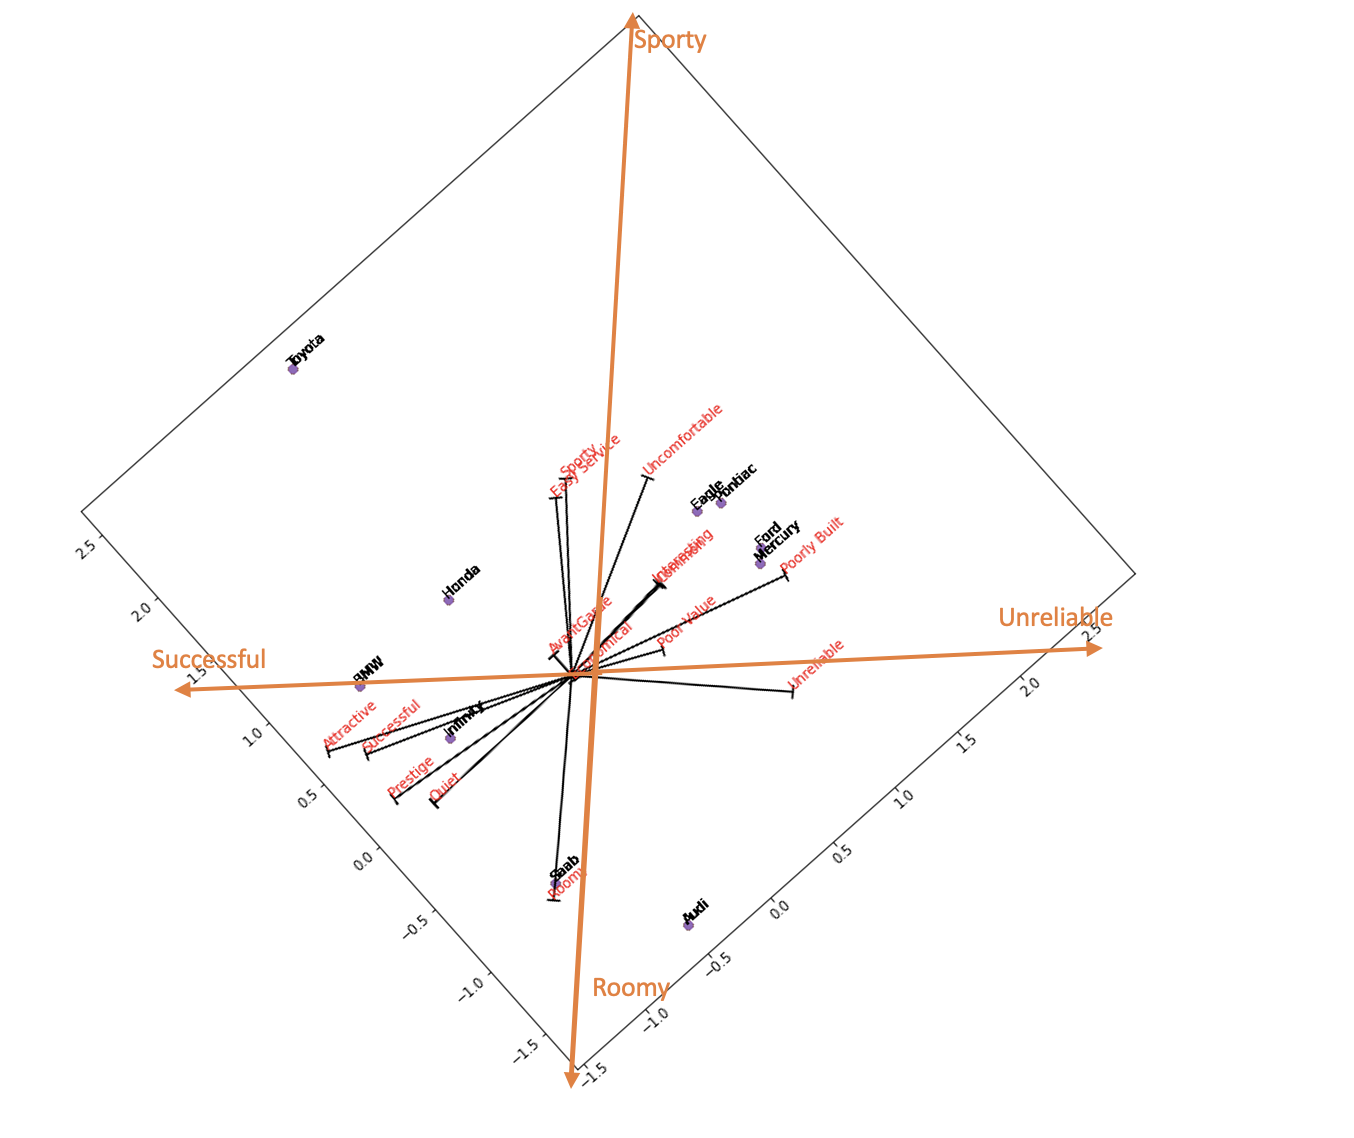

In [21]:
from IPython.display import Image
Image(filename='Graph3.png', width= 400, height= 400)

## adidas Problem

In [202]:
Men = pd.read_csv('ANSURIIMALEPublic.csv')

In [203]:
Men.mean()

subjectid                         20003.370897
abdominalextensiondepthsitting      254.650906
acromialheight                     1440.736894
acromionradialelength               335.244488
anklecircumference                  229.343949
                                      ...     
SubjectNumericRace                    8.973542
DODRace                               1.534052
Age                                  30.158991
Heightin                             70.035767
Weightlbs                           188.004900
Length: 99, dtype: float64

In [204]:
Upper = []
for i in ['chest','shoulder','waist','stature']:
    for j in Men.columns[Men.columns.str.contains(i)==True]: 
        Upper.append(j)

In [205]:
for i in Men.columns[Men.columns.str.contains('waist')]:
    print(i)

waistbacklength
waistbreadth
waistcircumference
waistdepth
waistfrontlengthsitting
waistheightomphalion


In [206]:
Men[Upper]

,chestbreadth,chestcircumference,chestdepth,chestheight,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,stature
0,291,1074,259,1292,1151,368,145,501,329,933,240,440,1054,1776
1,269,1021,253,1244,1119,353,141,432,316,870,225,371,1054,1702
2,288,1120,267,1288,1276,367,167,472,329,964,255,411,1041,1735
3,296,1114,262,1205,1155,330,148,461,315,857,205,399,968,1655
4,304,1048,232,1452,1231,400,180,467,303,868,214,379,1245,1914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,266,954,238,1231,1096,348,150,442,279,816,210,347,1016,1688
4078,323,1072,242,1301,1199,356,146,475,351,978,235,385,1082,1765
4079,290,1045,247,1263,1181,333,135,483,333,991,258,353,1011,1690
4080,284,984,228,1271,1162,358,154,430,293,783,192,350,1062,1718


In [240]:
data[['chestcircumference','shoulderelbowlength','waistcircumference','stature']]

,chestcircumference,shoulderelbowlength,waistcircumference,stature
0,1074,368,933,1776
1,1021,353,870,1702
2,1120,367,964,1735
3,1114,330,857,1655
4,1048,400,868,1914
...,...,...,...,...
4077,954,348,816,1688
4078,1072,356,978,1765
4079,1045,333,991,1690
4080,984,358,783,1718


In [241]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
data = Men[Upper]
data = data[['chestcircumference','shoulderelbowlength','waistcircumference','stature']]
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(df)

## Adding labels to DF
data['Label'] = kmeans.fit_predict(df)

In [242]:
### Measuring Goodness of Fit 
ave_within_cluster_mean_sum_of_squares = []
for k in range(2,11):
    np.random.seed(410014)
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(df)
    ave_within_cluster_mean_sum_of_squares.append((kmeansModel.inertia_)/df.shape[0])

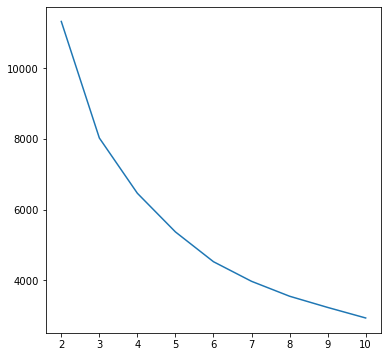

In [257]:
plt.rcParams["figure.figsize"] = (6,6)
x = [k for k in range(2,11)]
plt.plot(x, ave_within_cluster_mean_sum_of_squares)


It seems that more clusters (~10) is better. We also notice that there is a decrease in improvement after 3 clusters and 6. I chose to use 6 clusters as I felt 10 was a little bit too much in terms of sizes. 

In [273]:
### Matching labels with Sizes
chestsize = []
waistsize = []
statures = []
shouldersize = []
txt = ['XL','M','S','L','XS']
for i in range(5):
    chestsize.append(data[data['Label'] == i]['chestcircumference'].mean())
    waistsize.append(data[data['Label'] == i]['waistcircumference'].mean())
    statures.append(data[data['Label'] == i]['stature'].mean())
    shouldersize.append(data[data['Label'] == i]['shoulderelbowlength'].mean())
#print(i,'Chest: ',data[data['Label'] == i]['chestcircumference'].mean(),'Waist: ',)

In [274]:
for i in range(5):
    print(f'Size {txt[i]}: ','chest:',format(chestsize[i],".2f"),' waist:',format(waistsize[i],".2f"),' stature:',format(statures[i],".2f"),' shoulder:',format(shouldersize[i],".2f"))

Size XL:  chest: 1196.98  waist: 1123.29  stature: 1804.00  shoulder: 373.95
Size M:  chest: 1046.77  waist: 917.04  stature: 1819.84  shoulder: 377.44
Size S:  chest: 950.48  waist: 798.01  stature: 1736.87  shoulder: 359.03
Size L:  chest: 1114.34  waist: 1015.79  stature: 1745.16  shoulder: 361.50
Size XS:  chest: 1030.04  waist: 907.99  stature: 1695.38  shoulder: 350.97


In [ ]:
['chestcircumference','shoulderelbowlength','waistcircumference','stature']

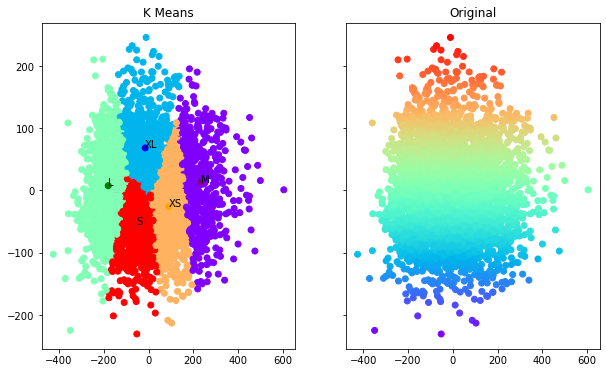

In [275]:
plt.rcParams["figure.figsize"] = (6,6)
txt = ['M','XL','L','XS','S']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df[:,0],df[:,1],c=kmeans.labels_,cmap='rainbow')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = ['purple','blue','g','orange','r'])
for i, j in enumerate(txt):
    ax1.annotate(j, (kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1]))
#ax1.annotate(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],['XS','S','M','L','XL'])
ax2.set_title("Original")
ax2.scatter(df[:,0],df[:,1],c=df[:,1],cmap='rainbow')

In [321]:
data[data['Label'] == 2].mean()

chestbreadth                296.032765
chestcircumference         1083.032765
chestdepth                  260.229358
chestheight                1346.867628
shouldercircumference      1207.509830
shoulderelbowlength         379.129751
shoulderlength              153.986894
waistbacklength             489.471822
waistbreadth                334.593709
waistcircumference          959.951507
waistdepth                  240.344692
waistfrontlengthsitting     399.323722
waistheightomphalion       1108.994758
stature                    1825.298820
Label                         2.000000
dtype: float64

In [309]:
data['chestcircumference'].describe()

count    4082.000000
mean     1058.705537
std        87.435272
min       774.000000
25%       996.000000
50%      1056.000000
75%      1117.000000
max      1469.000000
Name: chestcircumference, dtype: float64

For 1 components GOF = 6.71835793739135
For 2 components GOF = 10.438680772461582
For 3 components GOF = 11.129906215281334
For 4 components GOF = 11.618569735085234
For 5 components GOF = 11.886472601220836
For 6 components GOF = 12.664732259039154
For 7 components GOF = 12.76215918810138
For 8 components GOF = 13.170341150360684
For 9 components GOF = 13.028131895749814
For 10 components GOF = 13.318354324156642


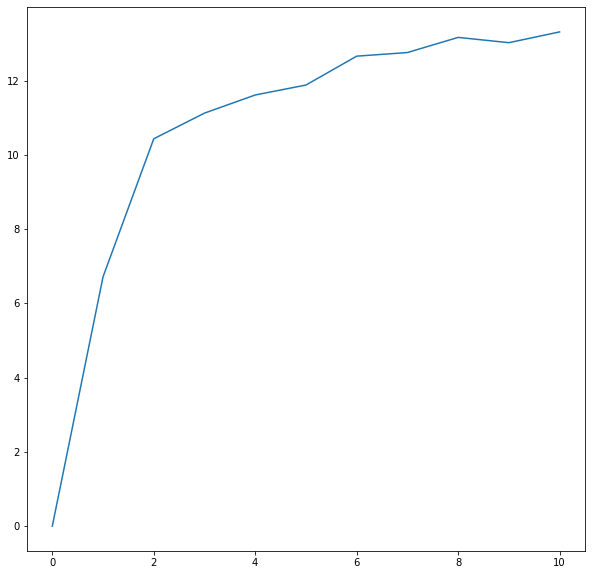

In [323]:
from factor_analyzer import FactorAnalyzer
y = [0]
x = [0]
for i in range(1,11):
    fa = FactorAnalyzer(n_factors=i, rotation=None)
    fa_fit_out = fa.fit(data)
    fa_communalities = fa_fit_out.get_communalities()
    fa_gof = sum(fa_communalities)
    fa_scores = fa_fit_out.transform(data)
    fa_factor_loadings = fa_fit_out.loadings_
    y.append(fa_gof)
    print(f'For {i} components GOF = {fa_gof}')
    x.append(i)
plt.plot(x,y)

In [276]:
2**61

2305843009213693952